In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from load import *

In [8]:
nt_motion = load_cd10('data/pre-nt650.csv.gz')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [9]:
nt_motion


,pack,display_name,well,well_index,row,column,well_label,run,submission,physical_plate,...,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496
name,,,,,,,,,,,,,,,,,,,,,
solvent (-),NaN,solvent (-),496779,1,1,1,A01,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496780,2,1,2,A02,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496781,3,1,3,A03,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496782,4,1,4,A04,5293,424f171b2f73,4696,...,323.0,282.0,243.0,292.0,97.0,112.0,25.0,51.0,22.0,46.0
solvent (-),NaN,solvent (-),496783,5,1,5,A05,5293,424f171b2f73,4696,...,465.0,211.0,173.0,124.0,19.0,21.0,19.0,21.0,0.0,13.0
solvent (-),NaN,solvent (-),496784,6,1,6,A06,5293,424f171b2f73,4696,...,94.0,20.0,1.0,0.0,4.0,114.0,15.0,9.0,7.0,0.0
solvent (-),NaN,solvent (-),496785,7,1,7,A07,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496786,8,1,8,A08,5293,424f171b2f73,4696,...,204.0,121.0,185.0,472.0,371.0,570.0,508.0,717.0,424.0,454.0
solvent (-),NaN,solvent (-),496787,9,1,9,A09,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,5.0


In [11]:
nt_targets = "nt650-targets.csv"
targets = pd.read_csv(nt_targets,index_col=0) 
targets

,rule_id,inchikey,chembl_id,predicate_id,ref_id,compound_id,object_id,object_external_id,object_name,predicate_name,ref_name
0,8127,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,14,22,14,256,BE0000694,Beta-2 adrenergic receptor,agonist,drugbank:targets:human
1,117558,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,71,47,14,5493,CHEMBL210,Beta-2 adrenergic receptor,agonist,chembl:mechs
2,129817,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,132,14,5493,CHEMBL210,Beta-2 adrenergic receptor,reported_activity,chembl:activity
3,129818,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,132,14,5492,CHEMBL213,Beta-1 adrenergic receptor,reported_activity,chembl:activity
4,129819,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,132,14,5466,CHEMBL273,Serotonin 1a (5-HT1a) receptor,reported_activity,chembl:activity
5,131549,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,156,14,6995,CHEMBL2096974,Adrenergic receptor beta; ADRB1 & ADRB2,reported_activity,chembl:activity:superset
6,131550,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,156,14,5826,CHEMBL2331074,Adrenergic receptor,reported_activity,chembl:activity:superset
7,131551,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,156,14,6996,CHEMBL2111388,Beta-2 adrenergic receptor and beta-3 adrenerg...,reported_activity,chembl:activity:superset
8,131552,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,156,14,5806,CHEMBL2094118,Adrenergic receptor beta,reported_activity,chembl:activity:superset
9,131553,STJMRWALKKWQGH-UHFFFAOYSA-N,CHEMBL49080,89,156,14,6997,CHEMBL2097169,Adrenergic receptor beta; ADRB1 & ADRB3,reported_activity,chembl:activity:superset


In [14]:
len(nt_motion[nt_motion['display_name'] == 'solvent (-)'])

768

In [157]:
import os
os.makedirs('solvent_models')


In [165]:
import sklearn.externals.joblib as joblib

In [177]:
from sklearn.ensemble import RandomForestClassifier
goodDrugsMI = []
def evaluate(by_solvent, by_compound, name):
    y1 = (by_solvent['name'] == 'solvent (-)').values
    X1 = by_solvent.values[:,-20496:]
    y2 = (by_compound['name'] == 'solvent (-)').values
    X2 = by_compound.values[:,-20496:]
    
    #create train and test sets
    MI_test = np.concatenate((X1[:4], X2[:2]))
    MI_train = np.concatenate((X1[4:], X2[2:]))
    solvent_test = np.concatenate((y1[:4], y2[:2]))
    solvent_train = np.concatenate((y1[4:], y2[2:]))
    
    #randomize order
    random_order1 = np.random.permutation(len(MI_train)) # gets a new order for the dataset
    random_order2 = np.random.permutation(len(MI_test)) # gets a new order for the dataset
    MI_train = MI_train[random_order1]
    MI_test = MI_test[random_order2]
    solvent_train = solvent_train[random_order1]
    solvent_test = solvent_test[random_order2]
    
    classifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, n_jobs = 10)
    classifier = classifier.fit(MI_train, solvent_train)
    #y_predict = classifier.predict(MI_test)
    score = classifier.score(MI_test, solvent_test)
    joblib.dump(classifier, os.path.join('solvent_models', name + '.pkl'))
    joblib.dump(y_predict, os.path.join('solvent_models', name + 'predictions.pkl'))
    return score

        
        
all_solvents = nt_motion[nt_motion['name'] == 'solvent (-)']
scores = []
for name in nt_motion['name'].unique():
    if name == 'solvent (-)': continue
    by_compound = nt_motion[nt_motion['name'] == name]
    runs = by_compound['run'].unique()
    by_solvent = all_solvents[all_solvents['run'].isin(runs)].sort_values('well')[:15]
    subdf = pd.concat([by_solvent, by_compound])
    #print(len(subdf))
    score = evaluate(by_solvent, by_compound, name)
    scores.append((name, score))
    print((name, score))

('HIHZDNKKIUQQSC-UHFFFAOYSA-N', 0.6666666666666666)
('PURFQCFKYNMIQF-UHFFFAOYSA-N', 0.6666666666666666)
('CZSAXNDACBPMAB-UHFFFAOYSA-N', 0.6666666666666666)
('IROWCYIEJAOFOW-UHFFFAOYSA-N', 0.6666666666666666)
('OGIYDFVHFQEFKQ-UHFFFAOYSA-N', 0.6666666666666666)
('LRFLWCZMTGTUEP-UHFFFAOYSA-N', 0.6666666666666666)
('XFRXWLWUUDJHPB-UHFFFAOYSA-N', 0.6666666666666666)
('IWSWDOUXSCRCKW-UHFFFAOYSA-N', 0.6666666666666666)
('BEEDODBODQVSIM-UHFFFAOYSA-N', 0.6666666666666666)
('NIBOMXUDFLRHRV-UHFFFAOYSA-N', 0.6666666666666666)
('BLGXFZZNTVWLAY-DKJBZYCGSA-N', 0.6666666666666666)
('VCZXZECZIRGUCZ-UHFFFAOYSA-N', 0.6666666666666666)
('OULFYKAESNCMFJ-UHFFFAOYSA-N', 0.6666666666666666)
('VQAAEWMEVIOHTJ-UHFFFAOYSA-N', 1.0)
('ONSOQRPYFKDOEB-UHFFFAOYSA-N', 0.6666666666666666)
('IENZQIKPVFGBNW-UHFFFAOYSA-N', 0.6666666666666666)
('QFOPFGRPNPCPBX-UHFFFAOYSA-N', 1.0)
('KAHMEWANVDFFCQ-UHFFFAOYSA-N', 0.6666666666666666)
('KTMLZVUAXJERAT-UHFFFAOYSA-N', 0.6666666666666666)
('GIEFXLLRTJNFGT-LOCPCMAASA-N', 0.66666666

('VIAIHLLKDJKEKM-MBWRGRGVSA-N', 0.6666666666666666)
('KNJKRQXCFJCQHC-XXCZMEBESA-N', 0.6666666666666666)
('FHEZDPDAYTVKKG-JLBKCEDKSA-N', 0.6666666666666666)
('PGZRDDYTKFZSFR-KCZVDYSFSA-N', 0.6666666666666666)
('OBSYBRPAKCASQB-AGQYDFLVSA-N', 0.6666666666666666)
('QIIKEXXYYPDZHL-UHFFFAOYSA-N', 0.8333333333333334)
('BIPHUOBUKMPSQR-NQGXHZAGSA-N', 0.6666666666666666)
('KQWVAUSXZDRQPZ-OCTGXNKJSA-N', 0.6666666666666666)
('SIGUESLDUAWFPE-OCTGXNKJSA-N', 0.6666666666666666)
('KDEBSUYWJUBPCB-ZHYTUUPESA-N', 0.6666666666666666)
('FNDGLVOYAQNQPE-UHFFFAOYSA-N', 0.6666666666666666)
('KGMMGVIYOHGOKQ-JAXOOIEVSA-N', 0.6666666666666666)
('KGMMGVIYOHGOKQ-APTPAJQOSA-N', 0.6666666666666666)
('JOJPJLHRMGPDPV-LZQROVCBSA-N', 0.6666666666666666)
('BNWYENYHNOESCX-ZMBIFBSDSA-N', 0.6666666666666666)
('RHBRMCOKKKZVRY-OGWSAYKTSA-N', 0.6666666666666666)
('PPKXEPBICJTCRU-DMLYUBSXSA-N', 0.6666666666666666)
('ZHVWWEYETMPAMX-OOGIKFLQSA-N', 0.8333333333333334)
('VFLWVWZSDBTGQJ-UHFFFAOYSA-N', 1.0)
('BJJKMJWQLJIRGF-VEIFNGETSA

('JLVFQWFTNVMTEG-UHFFFAOYSA-N', 0.6666666666666666)
('GUGOEEXESWIERI-UHFFFAOYSA-N', 0.6666666666666666)
('DRLFMBDRBRZALE-UHFFFAOYSA-N', 0.6666666666666666)
('OFCLARYYBGKCHN-UHFFFAOYSA-N', 0.6666666666666666)
('NVUGEQAEQJTCIX-UHFFFAOYSA-N', 0.6666666666666666)
('LUINDDOUWHRIPW-UHFFFAOYSA-N', 0.8333333333333334)
('HDOIPCLEKCEANF-UHFFFAOYSA-N', 1.0)
('MPZVHKLZCUEJFO-UHFFFAOYSA-N', 0.6666666666666666)
('FJDDSMSDZHURBJ-UHFFFAOYSA-N', 0.6666666666666666)
('WVVXBPKOIZGVNS-UHFFFAOYSA-N', 0.6666666666666666)
('HSOHROOUHRUSJR-UHFFFAOYSA-N', 0.6666666666666666)
('RVIGBTUDFAGRTQ-UHFFFAOYSA-N', 0.6666666666666666)
('RCYLUNPFECYGDW-UHFFFAOYSA-N', 1.0)
('JAUOIFJMECXRGI-UHFFFAOYSA-N', 0.6666666666666666)
('HOKKHZGPKSLGJE-GSVOUGTGSA-N', 0.6666666666666666)
('GGMYWPBNZXRMME-HSRNZHMGSA-N', 0.6666666666666666)
('GGMYWPBNZXRMME-MYNUVTBMSA-N', 0.6666666666666666)
('DDOQBQRIEWHWBT-GSVOUGTGSA-N', 0.6666666666666666)
('MJKADKZSYQWGLL-UHFFFAOYSA-N', 0.6666666666666666)
('BGKFPRIGXAVYNX-UHFFFAOYSA-N', 0.66666666

('QUNWUDVFRNGTCO-UHFFFAOYSA-N', 0.6666666666666666)
('DKISSNPEWQAXRA-UHFFFAOYSA-N', 0.6666666666666666)
('CDMZOKMMANFJMU-UHFFFAOYSA-N', 0.6666666666666666)
('QVAYTZAGDQIWMB-UHFFFAOYSA-N', 0.6666666666666666)
('IORPOFJLSIHJOG-UHFFFAOYSA-N', 0.6666666666666666)
('APIXJSLKIYYUKG-UHFFFAOYSA-N', 0.6666666666666666)
('CLIGSMOZKDCDRZ-UHFFFAOYSA-N', 1.0)
('SIQPXVQCUCHWDI-UHFFFAOYSA-N', 0.6666666666666666)
('MSJODEOZODDVGW-UHFFFAOYSA-N', 0.6666666666666666)
('WBWFIUAVMCNYPG-BQYQJAHWSA-N', 0.6666666666666666)
('VILIWRRWAWKXRW-UHFFFAOYSA-N', 0.6666666666666666)
('VVDXNJRUNJMYOZ-DHXVBOOMSA-N', 0.6666666666666666)
('WHSIXKUPQCKWBY-VTFQDDHLSA-N', 0.6666666666666666)
('DYCJFJRCWPVDHY-PKNZVCHQSA-N', 0.6666666666666666)
('BRSNNJIJEZWSBU-VHBSBENZSA-N', 0.6666666666666666)
('IZEKFCXSFNUWAM-UHFFFAOYSA-N', 0.6666666666666666)
('GFYLSDSUCHVORB-IOSLPCCCSA-N', 0.6666666666666666)
('VQAYFKKCNSOZKM-VTFQDDHLSA-N', 0.6666666666666666)
('DYSDOYRQWBDGQQ-SPDVFEMOSA-N', 0.6666666666666666)
('ZJUKTBDSGOFHSH-WFMPWKQPSA

In [18]:
from sklearn.ensemble import RandomForestClassifier
goodDrugsMI = []
def evaluate(subdf, name):
    X = subdf.values[:,-20496:]
    y = (subdf['display_name'] == 'solvent (-)').values
    
    #randomize order
    random_order = np.random.permutation(len(X)) # gets a new order for the dataset
    MI_train = X[random_order]
    solvent_train = y[random_order]

    classifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, n_jobs = 10, oob_score = True)
    classifier = classifier.fit(MI_train, solvent_train)
    #y_predict = classifier.predict(MI_test)
    #score = classifier.score(MI_test, solvent_test)
    #joblib.dump(classifier, os.path.join('solvent_models', name + '.pkl'))
    #joblib.dump(y_predict, os.path.join('solvent_models', name + 'predictions.pkl'))
    return classifier.oob_score_

        
        
all_solvents = nt_motion[nt_motion['display_name'] == 'solvent (-)']
scores2 = []
for name in nt_motion['display_name'].unique():
    if name == 'solvent (-)': continue
    by_compound = nt_motion[nt_motion['display_name'] == name]
    runs = by_compound['run'].unique()
    by_solvent = all_solvents[all_solvents['run'].isin(runs)].sort_values('well')[:15]
    subdf = pd.concat([by_solvent, by_compound])
    #print(len(subdf))
    score = evaluate(subdf, name)
    scores2.append((name, score))
    print((name, score))

('HIHZDNKKIUQQSC-UHFFFAOYSA-N', 0.75)
('PURFQCFKYNMIQF-UHFFFAOYSA-N', 0.75)
('CZSAXNDACBPMAB-UHFFFAOYSA-N', 0.75)
('IROWCYIEJAOFOW-UHFFFAOYSA-N', 0.85)
('OGIYDFVHFQEFKQ-UHFFFAOYSA-N', 0.75)
('LRFLWCZMTGTUEP-UHFFFAOYSA-N', 0.75)
('XFRXWLWUUDJHPB-UHFFFAOYSA-N', 0.8)
('IWSWDOUXSCRCKW-UHFFFAOYSA-N', 0.75)
('BEEDODBODQVSIM-UHFFFAOYSA-N', 0.75)
('NIBOMXUDFLRHRV-UHFFFAOYSA-N', 0.75)
('BLGXFZZNTVWLAY-DKJBZYCGSA-N', 0.75)
('VCZXZECZIRGUCZ-UHFFFAOYSA-N', 0.8)
('OULFYKAESNCMFJ-UHFFFAOYSA-N', 0.95)
('VQAAEWMEVIOHTJ-UHFFFAOYSA-N', 1.0)
('ONSOQRPYFKDOEB-UHFFFAOYSA-N', 0.75)
('IENZQIKPVFGBNW-UHFFFAOYSA-N', 0.75)
('QFOPFGRPNPCPBX-UHFFFAOYSA-N', 1.0)
('KAHMEWANVDFFCQ-UHFFFAOYSA-N', 0.85)
('KTMLZVUAXJERAT-UHFFFAOYSA-N', 0.75)
('GIEFXLLRTJNFGT-LOCPCMAASA-N', 0.8)
('AQASGOHUMGAWJJ-UHFFFAOYSA-N', 0.75)
('ZNIFSRGNXRYGHF-UHFFFAOYSA-N', 0.75)
('WDZVGELJXXEGPV-YIXHJXPBSA-N', 0.8)
('VCWFVUAJSIPMTF-WLHGVMLRSA-N', 0.75)
('XYLJNLCSTIOKRM-UHFFFAOYSA-N', 0.8)
('SAJKHRHHDGSJEZ-UHFFFAOYSA-N', 0.85)
('DDIQGSUEJOOQQQ-BT

('HYZHONGSQNXMPH-WFZMTUIASA-N', 0.75)
('QLLCUVACGPLGAX-XXCZMEBESA-N', 0.9)
('AKJDEXBCRLOVTH-UHFFFAOYSA-N', 0.8)
('YTBUMHOSKIAYCZ-UHFFFAOYSA-N', 0.85)
('UUKPIWYXWLJPJF-UHFFFAOYSA-N', 0.85)
('SRRUPDPTTGLICG-MOPGFXCFSA-N', 0.75)
('QUJWFJNHTBKCLU-UHFFFAOYSA-N', 0.75)
('OASPNIMFGJVLES-BTJKTKAUSA-N', 0.75)
('WOALTFHGLDVJHK-UHFFFAOYSA-N', 0.85)
('NXFDBTLQOARIMH-UHFFFAOYSA-N', 0.85)
('LFMYNZPAVPMEGP-PIDGMYBPSA-N', 0.75)
('HELCSESNNDZLFM-UHFFFAOYSA-N', 0.9)
('ZTGMHFIGNYXMJV-WUDOCBQASA-N', 0.9)
('WCMWVYQHPUQKHW-UHFFFAOYSA-N', 0.95)
('WGIDFDFAOQVAHY-SGNGHUOJSA-N', 0.75)
('OPNUROKCUBTKLF-UHFFFAOYSA-N', 0.85)
('WAZQVIBRRAMDNX-BTJKTKAUSA-N', 0.85)
('JUGOREOARAHOCO-UHFFFAOYSA-M', 0.75)
('VCOBYGVZILHVOO-UHFFFAOYSA-M', 0.75)
('XXRMYXBSBOVVBH-UHFFFAOYSA-N', 0.75)
('AFIIOPIEVQSYHH-UHFFFAOYSA-M', 0.75)
('AIXAANGOTKPUOY-UHFFFAOYSA-N', 0.75)
('WUFRNEJYZWHXLC-CTERPIQNSA-M', 0.75)
('SNICXCGAKADSCV-JTQLQIEISA-N', 0.85)
('OCDGBSUVYYVKQZ-UHFFFAOYSA-N', 0.75)
('LWWSARSTZGNKGV-UHFFFAOYSA-N', 0.75)
('DXUUXWKFVDVHIK

('BWXCECYGGMGBHD-GRTNUQQKSA-M', 0.75)
('SUWREQRNTXCCBL-UHFFFAOYSA-N', 0.75)
('ZJQHPWUVQPJPQT-UHFFFAOYSA-N', 0.75)
('NHVRIDDXGZPJTJ-UHFFFAOYSA-N', 0.75)
('UWVNHPNVOMFDHW-ODZAUARKSA-N', 0.75)
('ACVGNKYJVGNLIL-UHFFFAOYSA-N', 0.75)
('DQMZLTXERSFNPB-UHFFFAOYSA-N', 0.85)
('GUOQUXNJZHGPQF-UHFFFAOYSA-N', 1.0)
('UADPGHINQMWEAG-CSKARUKUSA-N', 0.75)
('JZUTXVTYJDCMDU-RBUKOAKNSA-N', 1.0)
('PIMZUZSSNYHVCU-YKWPQBAZSA-N', 0.95)
('AURFZBICLPNKBZ-SYBPFIFISA-N', 1.0)
('CYKYBWRSLLXBOW-GDYGHMJCSA-N', 1.0)
('CWRVKFFCRWGWCS-UHFFFAOYSA-N', 0.75)
('RMQJECWPWQIIPW-OWOJBTEDSA-N', 0.75)
('YZYRTEYMUTWJPL-UHFFFAOYSA-N', 0.75)
('UKHFPVCOXBJPIN-UHFFFAOYSA-N', 0.75)
('WGNGIELOOKACSB-UHFFFAOYSA-N', 1.0)
('WGRVAGIQTHEEQW-UHFFFAOYSA-N', 1.0)
('KOVRZNUMIKACTB-UHFFFAOYSA-N', 1.0)
('WEQAYVWKMWHEJO-UHFFFAOYSA-N', 0.75)
('LFTKOPVLNDVECX-QHCPKHFHSA-N', 0.7)
('VUWXAQFLTSBUDB-UHFFFAOYSA-N', 0.75)
('XTZUPNNVXIMWAR-UHFFFAOYSA-N', 0.75)
('HQRHGSRWOHGIRI-UHFFFAOYSA-N', 0.75)
('QMCOPDWHWYSJSA-UHFFFAOYSA-N', 0.75)
('OFBIFZUFASYYRE-UHF

In [19]:
scores2

[('HIHZDNKKIUQQSC-UHFFFAOYSA-N', 0.75),
 ('PURFQCFKYNMIQF-UHFFFAOYSA-N', 0.75),
 ('CZSAXNDACBPMAB-UHFFFAOYSA-N', 0.75),
 ('IROWCYIEJAOFOW-UHFFFAOYSA-N', 0.85),
 ('OGIYDFVHFQEFKQ-UHFFFAOYSA-N', 0.75),
 ('LRFLWCZMTGTUEP-UHFFFAOYSA-N', 0.75),
 ('XFRXWLWUUDJHPB-UHFFFAOYSA-N', 0.8),
 ('IWSWDOUXSCRCKW-UHFFFAOYSA-N', 0.75),
 ('BEEDODBODQVSIM-UHFFFAOYSA-N', 0.75),
 ('NIBOMXUDFLRHRV-UHFFFAOYSA-N', 0.75),
 ('BLGXFZZNTVWLAY-DKJBZYCGSA-N', 0.75),
 ('VCZXZECZIRGUCZ-UHFFFAOYSA-N', 0.8),
 ('OULFYKAESNCMFJ-UHFFFAOYSA-N', 0.95),
 ('VQAAEWMEVIOHTJ-UHFFFAOYSA-N', 1.0),
 ('ONSOQRPYFKDOEB-UHFFFAOYSA-N', 0.75),
 ('IENZQIKPVFGBNW-UHFFFAOYSA-N', 0.75),
 ('QFOPFGRPNPCPBX-UHFFFAOYSA-N', 1.0),
 ('KAHMEWANVDFFCQ-UHFFFAOYSA-N', 0.85),
 ('KTMLZVUAXJERAT-UHFFFAOYSA-N', 0.75),
 ('GIEFXLLRTJNFGT-LOCPCMAASA-N', 0.8),
 ('AQASGOHUMGAWJJ-UHFFFAOYSA-N', 0.75),
 ('ZNIFSRGNXRYGHF-UHFFFAOYSA-N', 0.75),
 ('WDZVGELJXXEGPV-YIXHJXPBSA-N', 0.8),
 ('VCWFVUAJSIPMTF-WLHGVMLRSA-N', 0.75),
 ('XYLJNLCSTIOKRM-UHFFFAOYSA-N', 0.8),
 ('SAJK

In [ ]:
('HIHZDNKKIUQQSC-UHFFFAOYSA-N', 0.75)
('PURFQCFKYNMIQF-UHFFFAOYSA-N', 0.75)
('CZSAXNDACBPMAB-UHFFFAOYSA-N', 0.75)
('IROWCYIEJAOFOW-UHFFFAOYSA-N', 0.9)
('OGIYDFVHFQEFKQ-UHFFFAOYSA-N', 0.75)
('LRFLWCZMTGTUEP-UHFFFAOYSA-N', 0.75)
('XFRXWLWUUDJHPB-UHFFFAOYSA-N', 0.75)
('IWSWDOUXSCRCKW-UHFFFAOYSA-N', 0.75)
('BEEDODBODQVSIM-UHFFFAOYSA-N', 0.75)
('NIBOMXUDFLRHRV-UHFFFAOYSA-N', 0.75)
('BLGXFZZNTVWLAY-DKJBZYCGSA-N', 0.75)
('VCZXZECZIRGUCZ-UHFFFAOYSA-N', 0.8)
('OULFYKAESNCMFJ-UHFFFAOYSA-N', 0.95)
('VQAAEWMEVIOHTJ-UHFFFAOYSA-N', 1.0)
('ONSOQRPYFKDOEB-UHFFFAOYSA-N', 0.75)
('IENZQIKPVFGBNW-UHFFFAOYSA-N', 0.75)
('QFOPFGRPNPCPBX-UHFFFAOYSA-N', 1.0)
('KAHMEWANVDFFCQ-UHFFFAOYSA-N', 0.85)
('KTMLZVUAXJERAT-UHFFFAOYSA-N', 0.75)
('GIEFXLLRTJNFGT-LOCPCMAASA-N', 0.8)
('AQASGOHUMGAWJJ-UHFFFAOYSA-N', 0.75)
('ZNIFSRGNXRYGHF-UHFFFAOYSA-N', 0.75)
('WDZVGELJXXEGPV-YIXHJXPBSA-N', 0.8)
('VCWFVUAJSIPMTF-WLHGVMLRSA-N', 0.75)
('XYLJNLCSTIOKRM-UHFFFAOYSA-N', 0.8)
('SAJKHRHHDGSJEZ-UHFFFAOYSA-N', 0.9)
('DDIQGSUEJOOQQQ-BTJKTKAUSA-N', 0.75)
('ANDJPJNFVJXEKX-UHFFFAOYSA-N', 0.75)
('DZTZUOBWDBPPJQ-BQBHMPFISA-N', 0.75)
('JVGBTTIJPBFLTE-UHFFFAOYSA-N', 0.9)
('PIPZGJSEDRMUAW-VJDCAHTMSA-N', 0.75)
('SPXACGZWWVIDGR-SPZWACKZSA-N', 0.85)
('ADYPXRFPBQGGAH-UMYZUSPBSA-N', 0.9)
('YSEXMKHXIOCEJA-FVFQAYNVSA-N', 0.75)
('METKIMKYRPQLGS-UHFFFAOYSA-N', 0.75)
('METKIMKYRPQLGS-LBPRGKRZSA-N', 0.75)
('NWIUTZDMDHAVTP-UHFFFAOYSA-N', 0.75)
('CTENFNNZBMHDDG-UHFFFAOYSA-N', 0.75)
('JCDRZCWRRLKLTB-UHFFFAOYSA-N', 0.75)
('ZGHHIOBQEXZBAG-UHFFFAOYSA-N', 0.75)
('KIRYNZFMOLYYQB-YECZQDJWSA-N', 1.0)
('NOJMTMIRQRDZMT-GSPXQYRGSA-N', 0.75)
('UJYGDMFEEDNVBF-OGGGUQDZSA-N', 1.0)
('AMTYJSWZECGJOO-BTJKTKAUSA-N', 1.0)
('KAAZGXDPUNNEFN-UHFFFAOYSA-N', 1.0)
('QZUDBNBUXVUHMW-UHFFFAOYSA-N', 0.75)
('MIBSKSYCRFWIRU-UHFFFAOYSA-N', 1.0)
('ODNDMTWHRYECKX-UHFFFAOYSA-N', 0.95)
('IQRDHLSQXOATHD-HBRCEPSSSA-N', 0.85)
('CRJHBCPQHRVYBS-UHFFFAOYSA-N', 0.75)
('HJHVRVJTYPKTHX-HTMVYDOJSA-N', 0.75)
('WCPXLMIPGMFZMY-MERQFXBCSA-N', 0.75)
('OYCAEWMSOPMASE-XFULWGLBSA-N', 0.8)
('NZFNXWQNBYZDAQ-UHFFFAOYSA-N', 1.0)
('QZRUMKUMFJJARD-AAJWHBHYSA-N', 1.0)
('SKYZYDSNJIOXRL-BTQNPOSSSA-N', 0.85)
('FBSMERQALIEGJT-UHFFFAOYSA-N', 1.0)
('NJMYODHXAKYRHW-DVZOWYKESA-N', 1.0)
('FGXWKSZFVQUSTL-UHFFFAOYSA-N', 0.75)
('MBHNWCYEGXQEIT-UHFFFAOYSA-N', 0.9)
('CVQFAMQDTWVJSV-BAXNFHPCSA-N', 0.95)
('UWCVGPLTGZWHGS-ZORIOUSZSA-N', 1.0)
('WDEMLQIGYYLRRX-OWVUFADGSA-N', 0.75)
('RAPZEAPATHNIPO-UHFFFAOYSA-N', 0.75)
('KVWDHTXUZHCGIO-UHFFFAOYSA-N', 0.75)
('BGRJTUBHPOOWDU-NSHDSACASA-N', 0.75)
('FSIQDESGRQTFNN-BTJKTKAUSA-N', 0.75)
('WRNKIDLXXXIELU-IEBWSBKVSA-N', 0.9)
('PQPGUUQPTSMLKU-YYLIZZNMSA-N', 0.8)
('INNWVRBZMBCEJI-UHFFFAOYSA-N', 0.75)
('JMRYYMBDXNZQMH-UHFFFAOYSA-N', 0.9)
('LLBLNMUONVVVPG-UHFFFAOYSA-N', 0.8)
('BGRJTUBHPOOWDU-UHFFFAOYSA-N', 0.75)
('DPQAXNSOFFYKDS-UHFFFAOYSA-N', 0.8)
('FJUKDAZEABGEIH-UHFFFAOYSA-N', 0.85)
('JURUFADWVGXLOY-BTJKTKAUSA-N', 1.0)
('JARNORYOPMINDY-UHFFFAOYSA-N', 0.8)
('NLMPGIXLXSPNFS-UHFFFAOYSA-N', 0.75)
('YOILXOMTHPUMRG-TZMCWYRMSA-N', 1.0)
('LTXWEVPOJXPWAD-UHFFFAOYSA-N', 0.75)
('MEQAJDYHKYAPJE-GUUGRXDUSA-N', 0.8)
('OOHVXDUNWCMZCI-BTJKTKAUSA-N', 1.0)
('OGMGYKPECFQXJJ-UHFFFAOYSA-N', 0.9)
('HZRPUQURUAXOHB-UHFFFAOYSA-N', 1.0)
('KJSOYZLYCFYXFC-UHFFFAOYSA-N', 0.75)
('NAEUGRPISCANHO-BTJKTKAUSA-N', 0.75)
('GFYDPSQWJUUKGA-UHFFFAOYSA-N', 0.75)
('IAZDPXIOMUYVGZ-UHFFFAOYSA-N', 0.7)
('YEWGIGCYIAMFMA-UHFFFAOYSA-N', 0.75)
('YOORVSGDAHWVMC-UHFFFAOYSA-N', 0.75)
('FXKCQWIUITUJFU-UHFFFAOYSA-N', 1.0)
('HJDXBLLTRMCYNC-JFXLULTRSA-N', 1.0)
('NQWRSILGEXNJIT-UHFFFAOYSA-N', 1.0)
('ZBSZWEYIIGLGSX-RDRKJGRWSA-N', 1.0)
('YYCOJKPDBCMVPP-UHFFFAOYSA-N', 0.75)
('SPXACGZWWVIDGR-IFBFGWFZSA-N', 0.75)
('BXDAOUXDMHXPDI-UHFFFAOYSA-N', 1.0)
('YOURSPNOEWYAKO-UHFFFAOYSA-N', 0.95)
('YQZBAXDVDZTKEQ-UHFFFAOYSA-N', 1.0)
('CTAUBYSSTAODOD-PKLMIRHRSA-N', 0.9)
('KNACNUUSUYTFDY-LIWDBWMRSA-N', 0.8)
('YREISLCRUMOYAY-BTJKTKAUSA-N', 0.8)
('YDOTUXAWKBPQJW-NSLWYYNWSA-N', 1.0)
('WLXGFAVTAAQOFH-UHFFFAOYSA-N', 0.8)
('PKNXICFDFBSZMX-PFEQFJNWSA-N', 0.95)
('MDIGAZPGKJFIAH-UHFFFAOYSA-N', 0.75)
('HNSITEGFVDCKMF-SPIKMXEPSA-N', 0.75)
('UHLVYEOCPBNJNA-BTJKTKAUSA-N', 0.85)
('GRXDJABVNGUGCW-UHFFFAOYSA-N', 0.75)
('HTEVMLYDEWVIQE-SPIKMXEPSA-N', 1.0)
('RJPZIQRLRMWPRF-UHFFFAOYSA-N', 0.85)
('OBWGMKKHCLHVIE-UHFFFAOYSA-N', 0.8)
('IWDBEHWZGDSFHR-BTJKTKAUSA-N', 1.0)
('FPCCSQOGAWCVBH-UHFFFAOYSA-N', 0.85)
('MNJNPLVXBISNSX-UHFFFAOYSA-N', 0.8)
('GELRVIPPMNMYGS-RVXRQPKJSA-N', 1.0)
('AXRUEPFPTQYHQD-UHFFFAOYSA-N', 0.75)
('ZYVYPNZFOCZLEM-UHFFFAOYSA-N', 0.85)
('LXOHMGALVZOYRF-BTJKTKAUSA-N', 0.9)
('GGYSHFFKUHGBIK-BTJKTKAUSA-N', 0.9)
('VAOSOCRJSSWBEQ-SPIKMXEPSA-N', 0.95)
('NBCXNOHQTALBRA-BTJKTKAUSA-N', 0.9)
('WKNFADCGOAHBPG-UHFFFAOYSA-N', 0.75)
('RICLFGYGYQXUFH-UHFFFAOYSA-N', 0.75)
('PZQZSWAOVAMBQM-BTJKTKAUSA-N', 0.75)
('XIGAHNVCEFUYOV-BTJKTKAUSA-N', 0.75)
('QTPPYQBUYPBJIC-UHFFFAOYSA-N', 0.75)
('UEDYXFOPCMTXEH-UHFFFAOYSA-N', 0.8)
('JORSCLBFSAAOFR-UHFFFAOYSA-N', 1.0)
('AFNQSRYIQUAMNM-UHFFFAOYSA-N', 0.75)
('DGNLGWJZZZOYPT-UHFFFAOYSA-N', 0.75)
('KQGJIKWDFWLCHO-UHFFFAOYSA-N', 1.0)
('NWTYATKFCSMIQK-GYDOPSIJSA-N', 0.75)
('KBKWJHYQFQONBJ-UHFFFAOYSA-N', 0.85)
('OCNROSNJUWZOCM-WLHGVMLRSA-N', 0.75)
('ZYCVVOZXHNDRCO-UHFFFAOYSA-N', 0.75)
('RONZAEMNMFQXRA-UHFFFAOYSA-N', 0.75)
('GQGDGISNRPBRSG-UHFFFAOYSA-N', 0.85)
('PYJBJMIBANAOFJ-UHFFFAOYSA-N', 0.8)
('MHXPYWFZULXYHT-UHFFFAOYSA-N', 0.9)
('PFIZGLUIYAZQFU-UHFFFAOYSA-N', 0.75)
('ZPMVNZLARAEGHB-UHFFFAOYSA-N', 1.0)
('JNNOSTQEZICQQP-UHFFFAOYSA-N', 0.75)
('SAIGGEUWSYESTR-UHFFFAOYSA-N', 0.9)
('WZHJKEUHNJHDLS-QTGUNEKASA-N', 1.0)
('YNPFMWCWRVTGKJ-UHFFFAOYSA-N', 0.8)
('DXUZZRDHJMOLTN-MRYVXRNOSA-N', 0.75)
('FOWAIJYHRWFTHR-UHFFFAOYSA-N', 0.8)
('FHUDRDSKZQDCBC-UHFFFAOYSA-N', 0.75)
('FUMINTAAUJUVMP-UHFFFAOYSA-N', 0.75)
('QSJAUJMEJZCQQU-UHFFFAOYSA-N', 0.75)
('HDDNYFLPWFSBLN-UHFFFAOYSA-N', 0.75)
('OEQHKNWFXHBJIT-UHFFFAOYSA-N', 0.9)
('BYHKGNWKJMGHGE-UHFFFAOYSA-N', 0.75)
('QYRYFNHXARDNFZ-UHFFFAOYSA-N', 0.85)
('WIHMBLDNRMIGDW-UHFFFAOYSA-N', 0.9)
('QLZLBYYNMGQIAR-UHFFFAOYSA-N', 0.8)
('LYMBEMCUJNDSBZ-UHFFFAOYSA-N', 0.75)
('WIMWMKZEIBHDTH-UHFFFAOYSA-N', 1.0)
('GIYXAJPCNFJEHY-UHFFFAOYSA-N', 0.85)
('LWYXFDXUMVEZKS-ZVFOLQIPSA-N', 0.75)
('TXVAYRSEKRMEIF-UHFFFAOYSA-N', 0.75)
('JOWUQCJWCRNVMQ-UHFFFAOYSA-N', 0.75)
('XIEGSJAEZIGKSA-LUNMCBQDSA-N', 0.8)
('GAAKALASJNGQKD-UHFFFAOYSA-N', 0.75)
('RGPDIGOSVORSAK-STHHAXOLSA-N', 0.75)
('ICONPJDAXITIPI-UXYWFNEESA-N', 0.75)
('VIAIHLLKDJKEKM-MBWRGRGVSA-N', 0.85)
('KNJKRQXCFJCQHC-XXCZMEBESA-N', 0.75)
('FHEZDPDAYTVKKG-JLBKCEDKSA-N', 0.75)
('PGZRDDYTKFZSFR-KCZVDYSFSA-N', 0.75)
('OBSYBRPAKCASQB-AGQYDFLVSA-N', 0.75)
('QIIKEXXYYPDZHL-UHFFFAOYSA-N', 0.9)
('BIPHUOBUKMPSQR-NQGXHZAGSA-N', 0.75)
('KQWVAUSXZDRQPZ-OCTGXNKJSA-N', 0.85)
('SIGUESLDUAWFPE-OCTGXNKJSA-N', 0.75)
('KDEBSUYWJUBPCB-ZHYTUUPESA-N', 0.8)
('FNDGLVOYAQNQPE-UHFFFAOYSA-N', 0.75)
('KGMMGVIYOHGOKQ-JAXOOIEVSA-N', 0.75)
('KGMMGVIYOHGOKQ-APTPAJQOSA-N', 0.75)
('JOJPJLHRMGPDPV-LZQROVCBSA-N', 0.75)
('BNWYENYHNOESCX-ZMBIFBSDSA-N', 0.75)
('RHBRMCOKKKZVRY-OGWSAYKTSA-N', 0.75)
('PPKXEPBICJTCRU-DMLYUBSXSA-N', 0.75)
('ZHVWWEYETMPAMX-OOGIKFLQSA-N', 0.95)
('VFLWVWZSDBTGQJ-UHFFFAOYSA-N', 1.0)
('BJJKMJWQLJIRGF-VEIFNGETSA-N', 0.85)
('WFUASZXAHZXJMX-PPPUBMIESA-N', 0.9)
('ZTGMHFIGNYXMJV-UHFFFAOYSA-N', 0.75)
('ABTNETSDXZBJTE-WLHGVMLRSA-N', 1.0)
('AQMPIDSGLFVVPL-UHFFFAOYSA-N', 1.0)
('FWMLYVACGDQRFU-ZTMWJVNESA-N', 0.75)
('RNHFGPXTKSIENU-KXNFBVDOSA-N', 0.75)
('HPZJMUBDEAMBFI-HSQYWUDLSA-N', 0.75)
('ZEXLJFNSKAHNFH-SYKYGTKKSA-N', 0.75)
('XIJHWXXXIMEHKW-LJWNLINESA-N', 0.75)
('DKELEHWYMDONTP-XMVUOOJOSA-N', 0.75)
('PKSODCLCMBUCPW-KXJTVXFKSA-N', 0.75)
('PULGYDLMFSFVBL-SMFNREODSA-N', 0.75)
('NOYOAHWKZQCDCM-YILJZHMHSA-N', 0.75)
('TWAIAYORTJMRDF-LLINQDLYSA-N', 0.75)
('UEVAHGMTRWGMTB-QORCZRPOSA-N', 0.75)
('WRPLGMBDXVBPEG-VGXZEHLRSA-N', 0.75)
('KHVTYJFKQLCXQE-IWIISZHXSA-N', 0.75)
('HISVWCQNZHJALM-JUQJVZEOSA-N', 0.75)
('ZHUJMSMQIPIPTF-IMNFJDCFSA-N', 0.75)
('PKDAQGGWFFBOOV-PMVMPFDFSA-N', 0.75)
('QZFUVGKXZOLGLU-XWGVYQGASA-N', 0.75)
('MVUYXNQARFGHMJ-UBLBMGLWSA-N', 0.75)
('ADBHAJDGVKLXHK-LMXUZNBISA-N', 0.75)
('LSQXZIUREIDSHZ-ZJZGAYNASA-N', 0.75)
('NUNBRHVOPFWRRG-LJXGPVSSSA-N', 0.75)
('FHZPGIUBXYVUOY-XDGMXVDYSA-N', 0.75)
('AGTSSZRZBSNTGQ-ITZCFHCWSA-N', 0.75)
('JXNRXNCCROJZFB-RYUDHWBXSA-N', 0.75)
('KZTDMJBCZSGHOG-XJIZABAQSA-N', 0.8)
('TYDMAYCCXBUMFX-ZAIVSCQOSA-N', 0.75)
('DXZHCOHYWFNWFZ-ZJARNZIRSA-N', 0.75)
('HYZHONGSQNXMPH-WFZMTUIASA-N', 0.75)
('QLLCUVACGPLGAX-XXCZMEBESA-N', 0.9)
('AKJDEXBCRLOVTH-UHFFFAOYSA-N', 0.8)
('YTBUMHOSKIAYCZ-UHFFFAOYSA-N', 0.85)
('UUKPIWYXWLJPJF-UHFFFAOYSA-N', 0.75)
('SRRUPDPTTGLICG-MOPGFXCFSA-N', 0.75)
('QUJWFJNHTBKCLU-UHFFFAOYSA-N', 0.85)
('OASPNIMFGJVLES-BTJKTKAUSA-N', 0.8)
('WOALTFHGLDVJHK-UHFFFAOYSA-N', 0.85)
('NXFDBTLQOARIMH-UHFFFAOYSA-N', 0.85)
('LFMYNZPAVPMEGP-PIDGMYBPSA-N', 0.75)
('HELCSESNNDZLFM-UHFFFAOYSA-N', 0.85)
('ZTGMHFIGNYXMJV-WUDOCBQASA-N', 0.9)
('WCMWVYQHPUQKHW-UHFFFAOYSA-N', 0.95)
('WGIDFDFAOQVAHY-SGNGHUOJSA-N', 0.75)
('OPNUROKCUBTKLF-UHFFFAOYSA-N', 0.8)
('WAZQVIBRRAMDNX-BTJKTKAUSA-N', 0.8)
('JUGOREOARAHOCO-UHFFFAOYSA-M', 0.75)
('VCOBYGVZILHVOO-UHFFFAOYSA-M', 0.75)
('XXRMYXBSBOVVBH-UHFFFAOYSA-N', 0.75)
('AFIIOPIEVQSYHH-UHFFFAOYSA-M', 0.75)
('AIXAANGOTKPUOY-UHFFFAOYSA-N', 0.75)
('WUFRNEJYZWHXLC-CTERPIQNSA-M', 0.75)
('SNICXCGAKADSCV-JTQLQIEISA-N', 0.85)
('OCDGBSUVYYVKQZ-UHFFFAOYSA-N', 0.75)
('LWWSARSTZGNKGV-UHFFFAOYSA-N', 0.75)
('DXUUXWKFVDVHIK-UHFFFAOYSA-N', 0.85)
('ANJTVLIZGCUXLD-DTWKUNHWSA-N', 0.9)
('QORVDGQLPPAFRS-XPSHAMGMSA-N', 0.75)
('GKPXMGUNTQSFGA-UHFFFAOYSA-N', 0.95)
('LYHWIOMAWPVTPI-UHFFFAOYSA-N', 0.9)
('IHTCZSNKQINGDD-UHFFFAOYSA-M', 0.75)
('RNAICSBVACLLGM-GNAZCLTHSA-N', 0.75)
('UBRKDAVQCKZSPO-UHFFFAOYSA-N', 0.75)
('HOZOZZFCZRXYEK-UHFFFAOYSA-M', 0.75)
('RDTKUZXIHMTSJO-UEIGIMKUSA-M', 0.75)
('LHLMOSXCXGLMMN-VYTJYVGHSA-M', 0.75)
('XWQWACGTGFICFO-UHFFFAOYSA-N', 0.8)
('FFNMBRCFFADNAO-UHFFFAOYSA-N', 0.8)
('BGDKAVGWHJFAGW-UHFFFAOYSA-N', 0.75)
('DZRJZDQAGMZGGA-UHFFFAOYSA-L', 0.75)
('VXBLRKDEHGKPAC-UHFFFAOYSA-M', 0.75)
('MQTVMZTUPOGGGV-UHFFFAOYSA-N', 0.7)
('ZJSIFVODFDHYJU-WLHGVMLRSA-N', 0.75)
('MKMYPTLXLWOUSO-NFQNBQCWSA-N', 0.75)
('WTIZFOAIQXMQHC-DPZBITMOSA-N', 0.75)
('DVQZHWAYOLXTHE-UHFFFAOYSA-N', 0.75)
('FPNVAOZHQUJJJQ-UHFFFAOYSA-L', 0.75)
('INBLZNJHDLEWPS-SLAHKOSISA-N', 0.75)
('NPIJXCQZLFKBMV-TZJMVAHLSA-L', 0.75)
('AZSNMRSAGSSBNP-KFHXLPTDSA-N', 1.0)
('QLMQSFIGPVLVAO-UHFFFAOYSA-N', 0.8)
('BHXGTFUQDGMXHA-BTJKTKAUSA-N', 0.75)
('VBUSCULTLLOSLM-BTJKTKAUSA-N', 0.8)
('XJNUHVMJVWOYCW-UHFFFAOYSA-N', 1.0)
('XFZJGFIKQCCLGK-UHFFFAOYSA-M', 0.75)
('KZFDKINRISJFCO-UHFFFAOYSA-N', 0.75)
('HOBWAPHTEJGALG-UHFFFAOYSA-N', 0.75)
('HLXQFVXURMXRPU-UHFFFAOYSA-L', 0.75)
('GFIGWAJEIMHJJB-LINSIKMZSA-N', 0.75)
('OPYKHUMNFAMIBL-UHFFFAOYSA-L', 0.8)
('PKVZBNCYEICAQP-UHFFFAOYSA-N', 0.75)
('LULNWZDBKTWDGK-UHFFFAOYSA-M', 0.75)
('VLXYTKMPCOQKEM-OFWMIIDDSA-N', 1.0)
('GXFZCDMWGMFGFL-KKXMJGKMSA-N', 0.75)
('KXZDBJPQBXAMST-UHFFFAOYSA-M', 0.8)
('WWJHRSCUAQPFQO-UHFFFAOYSA-M', 0.75)
('NLPRAJRHRHZCQQ-UHFFFAOYSA-N', 1.0)
('REEUVFCVXKWOFE-UHFFFAOYSA-K', 0.75)
('ZRJBHWIHUMBLCN-ZUZCIYMTSA-N', 0.75)
('NEEKVKZFYBQFGT-BTJKTKAUSA-N', 0.75)
('GLAOIODVNNXODI-UHDJGPCESA-M', 0.85)
('QZXMJYVXMZJOAO-UHFFFAOYSA-M', 1.0)
('WLYYOFJEBGHKEC-UHFFFAOYSA-N', 0.95)
('ZUFVXZVXEJHHBN-UHFFFAOYSA-N', 0.8)
('SUDGQQMEMAFCDK-NNRBVPJISA-N', 0.8)
('AXOJRQLKMVSHHZ-UHFFFAOYSA-N', 0.95)
('IQDIERHFZVCNRZ-LRCDAWNTSA-N', 0.75)
('HPWIBMJBDHQVMC-SRASDCGWSA-L', 0.9)
('XTLROSDJDZHIIK-CLAFQSOCSA-N', 0.75)
('CSLYOMBKQNZAED-RQLSQMFFSA-N', 0.85)
('HKQZUYOVMYOFIT-ZSXQYPCHSA-N', 0.75)
('CXFZFEJJLNLOTA-UHFFFAOYSA-N', 0.75)
('NTYJJOPFIAHURM-UHFFFAOYSA-N', 0.75)
('RWHNAAABSGVRDT-XRIGFGBMSA-N', 0.75)
('RWHNAAABSGVRDT-ZJIMSODOSA-N', 0.75)
('AYUQICXJAMPXPF-UHFFFAOYSA-N', 0.75)
('ODAOZWTYNWZSBY-SPIKMXEPSA-N', 0.75)
('JCCNYMKQOSZNPW-UHFFFAOYSA-N', 1.0)
('XFXNNOPUDSFVJE-UHFFFAOYSA-N', 0.75)
('GXDALQBWZGODGZ-UHFFFAOYSA-N', 0.75)
('DFWCPLGXFMSUCW-UHFFFAOYSA-N', 0.75)
('YNQQEYBLVYAWNX-WLHGVMLRSA-N', 0.85)
('PCHPORCSPXIHLZ-UHFFFAOYSA-N', 0.75)
('XXPDBLUZJRXNNZ-UHFFFAOYSA-N', 0.9)
('GGWBHVILAJZWKJ-KJEVSKRMSA-N', 0.85)
('WUYMIKDBRCCYGE-BTJKTKAUSA-N', 0.9)
('JXYWFNAQESKDNC-BTJKTKAUSA-N', 0.75)
('WYUYEJNGHIOFOC-NWBUNABESA-N', 0.75)
('AQIXAKUUQRKLND-UHFFFAOYSA-N', 0.75)
('ALCSGJCIESECFD-UHFFFAOYSA-N', 0.75)
('YDDXVAXDYKBWDX-UHFFFAOYSA-N', 0.75)
('IECBEVAUEBZJCF-SPIKMXEPSA-N', 0.85)
('YGNJPNRDGXJQJX-UHFFFAOYSA-N', 0.75)
('JIJQPEZAVLJZBO-UHFFFAOYSA-N', 0.75)
('BOSOGNBLIWPCMS-UHFFFAOYSA-N', 0.85)
('ZOOMDYHTGZSGDD-WLHGVMLRSA-N', 0.75)
('NPLHSMBWWIIWAQ-UHFFFAOYSA-N', 0.75)
('XUFQPHANEAPEMJ-UHFFFAOYSA-N', 0.75)
('JLVFQWFTNVMTEG-UHFFFAOYSA-N', 0.8)
('GUGOEEXESWIERI-UHFFFAOYSA-N', 0.75)
('DRLFMBDRBRZALE-UHFFFAOYSA-N', 0.8)
('OFCLARYYBGKCHN-UHFFFAOYSA-N', 0.75)
('NVUGEQAEQJTCIX-UHFFFAOYSA-N', 0.75)
('LUINDDOUWHRIPW-UHFFFAOYSA-N', 0.8)
('HDOIPCLEKCEANF-UHFFFAOYSA-N', 1.0)
('MPZVHKLZCUEJFO-UHFFFAOYSA-N', 0.75)
('FJDDSMSDZHURBJ-UHFFFAOYSA-N', 0.85)
('WVVXBPKOIZGVNS-UHFFFAOYSA-N', 0.75)
('HSOHROOUHRUSJR-UHFFFAOYSA-N', 0.75)
('RVIGBTUDFAGRTQ-UHFFFAOYSA-N', 0.75)
('RCYLUNPFECYGDW-UHFFFAOYSA-N', 1.0)
('JAUOIFJMECXRGI-UHFFFAOYSA-N', 0.75)
('HOKKHZGPKSLGJE-GSVOUGTGSA-N', 0.75)
('GGMYWPBNZXRMME-HSRNZHMGSA-N', 0.75)
('GGMYWPBNZXRMME-MYNUVTBMSA-N', 0.75)
('DDOQBQRIEWHWBT-GSVOUGTGSA-N', 0.75)
('MJKADKZSYQWGLL-UHFFFAOYSA-N', 0.75)
('BGKFPRIGXAVYNX-UHFFFAOYSA-N', 0.75)
('AVBSIKMUAFYZAV-UHFFFAOYSA-N', 0.8)
('RWVIMCIPOAXUDG-UHFFFAOYSA-N', 0.75)
('MXEFWCFPCLDOOG-UHFFFAOYSA-N', 0.75)
('HQPMJFFEXJELOQ-UHFFFAOYSA-N', 0.75)
('WFUASZXAHZXJMX-GBNZRNLASA-N', 0.75)
('WVMUCBHSEHBMKA-REOHCLBHSA-N', 0.75)
('UKBRUIZWQZHXFL-UHFFFAOYSA-N', 0.75)
('PTLWNCBCBZZBJI-UHNVWZDZSA-N', 0.75)
('VBRJFXSFCYEZMQ-HNNXBMFYSA-N', 0.75)
('PAJPWUMXBYXFCZ-UHFFFAOYSA-N', 0.8)
('HCKUBNLZMKAEIN-GSVOUGTGSA-N', 0.75)
('FUQOTYRCMBZFOL-UHFFFAOYSA-N', 0.75)
('UAWVRVFHMOSAPU-UHFFFAOYSA-N', 0.75)
('YCXDDPGRZKUGDG-UHFFFAOYSA-L', 0.75)
('NILQLFBWTXNUOE-UHFFFAOYSA-N', 0.75)
('WKGXYQFOCVYPAC-UHFFFAOYSA-N', 0.75)
('HCKUBNLZMKAEIN-VKHMYHEASA-N', 0.75)
('UCKHICKHGAOGAP-UONOGXRCSA-N', 0.75)
('FLVRDMUHUXVRET-UHFFFAOYSA-N', 0.85)
('XDRYMKDFEDOLFX-UHFFFAOYSA-N', 0.75)
('MKXZASYAUGDDCJ-NJAFHUGGSA-N', 0.95)
('QLTXKCWMEZIHBJ-PJGJYSAQSA-N', 0.75)
('MMMNTDFSPSQXJP-UHFFFAOYSA-N', 0.8)
('LCNBIHVSOPXFMR-UHFFFAOYSA-N', 0.85)
('VLSMHEGGTFMBBZ-OOZYFLPDSA-N', 0.75)
('SVJKYIUJRJEABK-UHFFFAOYSA-L', 0.9)
('ZXNRTKGTQJPIJK-UHFFFAOYSA-N', 0.75)
('BXBNADAPIHHXJQ-UHFFFAOYSA-N', 0.75)
('BOCUKUHCLICSIY-UHFFFAOYSA-N', 0.75)
('VZRNTCHTJRLTMU-UHFFFAOYSA-N', 0.75)
('XWUFTPIDMLSXES-QMMMGPOBSA-N', 0.75)
('ACIJGUBIMXQCMF-SCSAIBSYSA-N', 0.75)
('HCZHHEIFKROPDY-UHFFFAOYSA-N', 0.75)
('CQTYJLQESPLSOP-ZCFIWIBFSA-N', 0.75)
('LBTABPSJONFLPO-UHFFFAOYSA-N', 0.75)
('FXCTZFMSAHZQTR-KAMYIIQDSA-N', 0.8)
('IRJCBFDCFXCWGO-UHFFFAOYSA-N', 0.75)
('IGODGTDUQSMDQU-UHFFFAOYSA-N', 0.75)
('NRSBQSJHFYZIPH-DMTCNVIQSA-N', 0.75)
('ASNFTDCKZKHJSW-REOHCLBHSA-N', 0.75)
('PDNJLMZEGXHSCU-VKHMYHEASA-N', 0.75)
('DQLYTFPAEVJTFM-UHFFFAOYSA-N', 0.75)
('CHZBCZTXSTWCIG-ZETCQYMHSA-N', 0.75)
('AIEFWRHRHFRLFT-UHFFFAOYSA-N', 0.75)
('DNCAZYRLRMTVSF-UHFFFAOYSA-N', 0.75)
('DNCAZYRLRMTVSF-JTQLQIEISA-N', 0.75)
('HONKEGXLWUDTCF-YFKPBYRVSA-N', 0.75)
('MVDSFPIEJILRME-UHFFFAOYSA-N', 0.75)
('OZBFBAYESADVDX-UHFFFAOYSA-N', 0.75)
('FERIKTBTNCSGJS-KIGHRTHISA-N', 0.75)
('FERIKTBTNCSGJS-QWWZWVQMSA-N', 0.75)
('NZDIZJGEDFARSV-UHFFFAOYSA-N', 0.75)
('BZQFBWGGLXLEPQ-REOHCLBHSA-N', 0.75)
('JRQRKFDFHAPMGQ-UHFFFAOYSA-N', 0.75)
('IJVMOGKBEVRBPP-ZETCQYMHSA-N', 0.75)
('GSFCOAGADOGIGE-UHFFFAOYSA-N', 0.75)
('FERIKTBTNCSGJS-OCDMWJSJSA-N', 0.75)
('KRKRAOXTGDJWNI-DMTCNVIQSA-N', 0.75)
('VSMUYYFJVFSVCA-NWDGAFQWSA-N', 0.75)
('FHJNAFIJPFGZRI-WVZVXSGGSA-N', 0.75)
('HOOWCUZPEFNHDT-UHFFFAOYSA-N', 0.75)
('HOOWCUZPEFNHDT-ZETCQYMHSA-N', 0.75)
('DQFVBELGDROGDO-DKWTVANSSA-M', 0.75)
('PKDHDJBNEKXCBI-UHFFFAOYSA-N', 0.95)
('FPXPIEZPAXSELW-CYVLTUHYSA-N', 1.0)
('LOCPVWIREQIGNQ-CCEZHUSRSA-N', 1.0)
('SISOFUCTXZKSOQ-ZHACJKMWSA-N', 0.85)
('MATPZHBYOVDBLI-JJYYJPOSSA-N', 0.75)
('UNNFLFDQCHJXPI-QTBDOELSSA-N', 0.75)
('BTCSSZJGUNDROE-UHFFFAOYSA-N', 0.75)
('XDPUYXWLPXNCDY-UHFFFAOYSA-N', 0.75)
('OBZFLUDUSNCZKL-UHFFFAOYSA-N', 0.75)
('FMKJUUQOYOHLTF-OWOJBTEDSA-N', 0.75)
('FMKJUUQOYOHLTF-UPHRSURJSA-N', 0.75)
('ZDZDSZQYRBZPNN-UHFFFAOYSA-N', 0.75)
('MFUKVPOVVKKLRQ-UHFFFAOYSA-N', 0.75)
('QIIVUOWTHWIXFO-UHFFFAOYSA-N', 0.75)
('GJZVQXWEIYRHBE-UHFFFAOYSA-N', 0.75)
('ZQCFHOVIXCJPLE-LINSIKMZSA-N', 0.75)
('JYLNVJYYQQXNEK-UHFFFAOYSA-N', 0.75)
('MWHLCFYPFGFBQO-UHFFFAOYSA-N', 0.75)
('QEAOELIJQRYJJS-UHFFFAOYSA-N', 1.0)
('SNGGBKYQZVAQKA-UHFFFAOYSA-N', 0.8)
('PJDFLNIOAUIZSL-UHFFFAOYSA-N', 0.75)
('OLBCVFGFOZPWHH-UHFFFAOYSA-N', 1.0)
('FHCRBVQGMZUJKY-UHFFFAOYSA-N', 0.75)
('CDFQDLUHBLZCGL-UHFFFAOYSA-N', 0.75)
('KPYSYYIEGFHWSV-UHFFFAOYSA-N', 0.75)
('BWXCECYGGMGBHD-GRTNUQQKSA-M', 0.75)
('SUWREQRNTXCCBL-UHFFFAOYSA-N', 0.75)
('ZJQHPWUVQPJPQT-UHFFFAOYSA-N', 0.75)
('NHVRIDDXGZPJTJ-UHFFFAOYSA-N', 0.75)
('UWVNHPNVOMFDHW-ODZAUARKSA-N', 0.75)
('ACVGNKYJVGNLIL-UHFFFAOYSA-N', 0.75)
('DQMZLTXERSFNPB-UHFFFAOYSA-N', 0.85)
('GUOQUXNJZHGPQF-UHFFFAOYSA-N', 1.0)
('UADPGHINQMWEAG-CSKARUKUSA-N', 0.75)
('JZUTXVTYJDCMDU-RBUKOAKNSA-N', 1.0)
('PIMZUZSSNYHVCU-YKWPQBAZSA-N', 0.95)
('AURFZBICLPNKBZ-SYBPFIFISA-N', 1.0)
('CYKYBWRSLLXBOW-GDYGHMJCSA-N', 1.0)
('CWRVKFFCRWGWCS-UHFFFAOYSA-N', 0.75)
('RMQJECWPWQIIPW-OWOJBTEDSA-N', 0.75)
('YZYRTEYMUTWJPL-UHFFFAOYSA-N', 0.75)
('UKHFPVCOXBJPIN-UHFFFAOYSA-N', 0.75)
('WGNGIELOOKACSB-UHFFFAOYSA-N', 1.0)
('WGRVAGIQTHEEQW-UHFFFAOYSA-N', 1.0)
('KOVRZNUMIKACTB-UHFFFAOYSA-N', 1.0)
('WEQAYVWKMWHEJO-UHFFFAOYSA-N', 0.75)
('LFTKOPVLNDVECX-QHCPKHFHSA-N', 0.75)
('VUWXAQFLTSBUDB-UHFFFAOYSA-N', 0.75)
('XTZUPNNVXIMWAR-UHFFFAOYSA-N', 0.75)
('HQRHGSRWOHGIRI-UHFFFAOYSA-N', 0.75)
('QMCOPDWHWYSJSA-UHFFFAOYSA-N', 0.75)
('OFBIFZUFASYYRE-UHFFFAOYSA-N', 0.75)
('CPBYHTDUBNSBQM-UHFFFAOYSA-N', 0.75)
('RAVIZVQZGXBOQO-UHFFFAOYSA-N', 1.0)
('QRXWMOHMRWLFEY-UHFFFAOYSA-N', 0.8)
('TWBYWOBDOCUKOW-UHFFFAOYSA-N', 0.75)
('WHUUTDBJXJRKMK-GSVOUGTGSA-N', 0.75)
('JFRJCQJVFMHZOO-VLLTZWOLSA-N', 0.75)
('JADDQZYHOWSFJD-WRDYVDRVSA-N', 0.75)
('MYNRELUCFAQMFC-QRIDJOKKSA-N', 0.75)
('IPSYPUKKXMNCNQ-JJOHEJHASA-N', 0.75)
('HUJXGQILHAUCCV-USYJBCIFSA-N', 0.75)
('LDYMCRRFCMRFKB-USYJBCIFSA-N', 0.75)
('XTPOZVLRZZIEBW-UZFJHYNOSA-N', 0.75)
('TWWFAXQOKNBUCR-UHFFFAOYSA-N', 0.75)
('SCVHFRLUNIOSGI-UHFFFAOYSA-N', 0.75)
('SQMWSBKSHWARHU-HGOJYGERSA-N', 0.75)
('FFBDFADSZUINTG-UHFFFAOYSA-N', 0.75)
('ZFXYFBGIUFBOJW-UHFFFAOYSA-N', 0.75)
('NWPRCRWQMGIBOT-UHFFFAOYSA-N', 0.75)
('LXJSJIXZOAMHTG-UHFFFAOYSA-N', 0.75)
('FQPFAHBPWDRTLU-UHFFFAOYSA-N', 0.75)
('KGQZGCIVHYLPBH-UHFFFAOYSA-N', 0.75)
('RBQOQRRFDPXAGN-UHFFFAOYSA-N', 0.75)
('NSMXQKNUPPXBRG-UHFFFAOYSA-N', 0.75)
('RYYVLZVUVIJVGH-UHFFFAOYSA-N', 0.75)
('RIRGCFBBHQEQQH-IZGPSLQESA-N', 0.75)
('RIRGCFBBHQEQQH-OVUCSVQNSA-N', 0.75)
('JYEFPEJJPNYEHO-IMRLOADQSA-M', 0.75)
('HAUGRYOERYOXHX-UHFFFAOYSA-N', 0.75)
('QUNWUDVFRNGTCO-UHFFFAOYSA-N', 0.75)
('DKISSNPEWQAXRA-UHFFFAOYSA-N', 0.85)
('CDMZOKMMANFJMU-UHFFFAOYSA-N', 0.75)
('QVAYTZAGDQIWMB-UHFFFAOYSA-N', 0.75)
('IORPOFJLSIHJOG-UHFFFAOYSA-N', 0.75)
('APIXJSLKIYYUKG-UHFFFAOYSA-N', 0.75)
('CLIGSMOZKDCDRZ-UHFFFAOYSA-N', 0.95)
('SIQPXVQCUCHWDI-UHFFFAOYSA-N', 0.75)
('MSJODEOZODDVGW-UHFFFAOYSA-N', 0.85)
('WBWFIUAVMCNYPG-BQYQJAHWSA-N', 0.75)
('VILIWRRWAWKXRW-UHFFFAOYSA-N', 0.85)
('VVDXNJRUNJMYOZ-DHXVBOOMSA-N', 0.75)
('WHSIXKUPQCKWBY-VTFQDDHLSA-N', 0.75)
('DYCJFJRCWPVDHY-PKNZVCHQSA-N', 0.75)
('BRSNNJIJEZWSBU-VHBSBENZSA-N', 0.75)
('IZEKFCXSFNUWAM-UHFFFAOYSA-N', 0.75)
('GFYLSDSUCHVORB-IOSLPCCCSA-N', 0.75)
('VQAYFKKCNSOZKM-VTFQDDHLSA-N', 0.75)
('DYSDOYRQWBDGQQ-SPDVFEMOSA-N', 0.75)
('ZJUKTBDSGOFHSH-WFMPWKQPSA-N', 0.75)
('DBZQFUNLCALWDY-JXACCQRMSA-N', 0.75)
('TTWYZDPBDWHJOR-IDIVVRGQSA-L', 0.75)
('FDEODCTUSIWGLK-RSAXXLAASA-N', 0.8)
('FMQURVHYTBGYSQ-UHFFFAOYSA-H', 0.75)
('RJMCMLNRWDKUDB-UHFFFAOYSA-H', 0.75)
('KURWUCJJNVPCHT-PGXCWKBOSA-J', 0.75)
('XHWIRFKQZFSILU-MKMLRUMESA-J', 0.75)
('YOAHKNVSNCMZGQ-GMKVLROZSA-N', 0.75)
('CAWZRIXWFRFUQB-VTFQDDHLSA-N', 0.75)
('KZCUOVRMGTZINH-ZUWXYHGYSA-L', 0.75)
('VAPNKLKDKUDFHK-UHFFFAOYSA-H', 0.75)
('UDMBCSSLTHHNCD-KQYNXXCUSA-N', 0.75)
('VDRAJZSNVDDIMT-BMNOXIPCSA-M', 0.75)
('SRNWOUGRCWSEMX-TYASJMOZSA-N', 0.75)
('XTWYTFMLZFPYCI-KQYNXXCUSA-N', 0.75)
('MMJGIWFJVDOPJF-QRGWITRZSA-K', 0.75)
('XCCTYIAWTASOJW-JDNPWWSISA-N', 0.75)
('KURVIXMFFSNONZ-HVQNCJTOSA-L', 0.75)
('OLCWZBFDIYXLAA-IOSLPCCCSA-N', 0.85)
('MTKNGOHFNXIVOS-UHFFFAOYSA-N', 0.9)
('XKMLYUALXHKNFT-ACJOCUEISA-N', 0.75)
('QGWNDRXFNXRZMB-VKJDSPIKSA-N', 0.75)
In [362]:


In [362]:
nt_motion = load_cd10('data/pre-nt650.csv.gz')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [370]:
nt_motion

,pack,display_name,well,well_index,row,column,well_label,run,submission,physical_plate,...,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496
name,,,,,,,,,,,,,,,,,,,,,
solvent (-),NaN,solvent (-),496779,1,1,1,A01,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496780,2,1,2,A02,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496781,3,1,3,A03,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496782,4,1,4,A04,5293,424f171b2f73,4696,...,323.0,282.0,243.0,292.0,97.0,112.0,25.0,51.0,22.0,46.0
solvent (-),NaN,solvent (-),496783,5,1,5,A05,5293,424f171b2f73,4696,...,465.0,211.0,173.0,124.0,19.0,21.0,19.0,21.0,0.0,13.0
solvent (-),NaN,solvent (-),496784,6,1,6,A06,5293,424f171b2f73,4696,...,94.0,20.0,1.0,0.0,4.0,114.0,15.0,9.0,7.0,0.0
solvent (-),NaN,solvent (-),496785,7,1,7,A07,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),NaN,solvent (-),496786,8,1,8,A08,5293,424f171b2f73,4696,...,204.0,121.0,185.0,472.0,371.0,570.0,508.0,717.0,424.0,454.0
solvent (-),NaN,solvent (-),496787,9,1,9,A09,5293,424f171b2f73,4696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,5.0


In [128]:
nt_motion.iloc[:, -20496:]

,1,2,3,4,5,6,7,8,9,10,...,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496
name,,,,,,,,,,,,,,,,,,,,,
solvent (-),452.0,319.0,310.0,286.0,83.0,111.0,38.0,61.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),14.0,0.0,0.0,6.0,3.0,0.0,93.0,264.0,286.0,282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,323.0,282.0,243.0,292.0,97.0,112.0,25.0,51.0,22.0,46.0
solvent (-),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,211.0,173.0,124.0,19.0,21.0,19.0,21.0,0.0,13.0
solvent (-),270.0,123.0,97.0,91.0,29.0,50.0,10.0,36.0,7.0,30.0,...,94.0,20.0,1.0,0.0,4.0,114.0,15.0,9.0,7.0,0.0
solvent (-),108.0,71.0,110.0,67.0,48.0,46.0,110.0,42.0,19.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
solvent (-),0.0,0.0,1.0,0.0,196.0,199.0,159.0,75.0,1.0,7.0,...,204.0,121.0,185.0,472.0,371.0,570.0,508.0,717.0,424.0,454.0
solvent (-),652.0,434.0,454.0,614.0,478.0,637.0,380.0,425.0,200.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,5.0


In [97]:
IDs = []
scores = []
for i in scores2:
    score = i[1]
    name = i[0]
    names = nt_motion[nt_motion["display_name"] == name]
    ID = int(names["c_ids"].unique())
    scores.append(score)
    #ID = ID.tolist()
    if score > 0.75:
        IDs.append(ID)

IDs

[2078,
 336,
 2087,
 2088,
 2090,
 2091,
 2093,
 961,
 2097,
 2101,
 2103,
 90,
 729,
 2142,
 750,
 2143,
 638,
 2144,
 162,
 749,
 2145,
 560,
 2149,
 2150,
 2151,
 2152,
 2153,
 2154,
 2155,
 710,
 402,
 2160,
 2162,
 2163,
 2164,
 2165,
 2166,
 2167,
 2169,
 2170,
 2172,
 2173,
 2174,
 639,
 404,
 2179,
 2180,
 2181,
 2183,
 2184,
 2186,
 2187,
 2188,
 2189,
 2190,
 2191,
 2192,
 2193,
 2205,
 2207,
 2208,
 2210,
 556,
 1233,
 191,
 2214,
 2215,
 2216,
 2217,
 2218,
 2220,
 2225,
 2226,
 2227,
 2230,
 746,
 2234,
 2235,
 2236,
 2238,
 2240,
 1207,
 2241,
 198,
 2248,
 2250,
 2251,
 2254,
 196,
 2259,
 2264,
 2268,
 2270,
 2273,
 2280,
 2281,
 2282,
 2283,
 2285,
 2286,
 2304,
 2311,
 2312,
 2315,
 2316,
 2317,
 2318,
 2320,
 2321,
 2322,
 2324,
 2325,
 2326,
 2328,
 2329,
 2335,
 2338,
 2339,
 2342,
 2343,
 2351,
 2363,
 2364,
 2367,
 2373,
 2376,
 2378,
 2380,
 2383,
 2384,
 2385,
 2386,
 2387,
 2388,
 2390,
 2392,
 1494,
 161,
 2401,
 2403,
 2404,
 2405,
 2410,
 2414,
 2417,
 2418

In [98]:
scores

[0.75,
 0.75,
 0.75,
 0.8,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.8,
 0.95,
 1.0,
 0.75,
 0.75,
 1.0,
 0.85,
 0.75,
 0.8,
 0.75,
 0.75,
 0.8,
 0.75,
 0.75,
 0.85,
 0.75,
 0.75,
 0.75,
 0.9,
 0.75,
 0.85,
 0.9,
 0.8,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 1.0,
 0.8,
 0.95,
 1.0,
 1.0,
 0.8,
 1.0,
 0.95,
 0.85,
 0.75,
 0.75,
 0.75,
 0.8,
 1.0,
 1.0,
 0.85,
 1.0,
 1.0,
 0.75,
 0.9,
 0.9,
 1.0,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.85,
 0.75,
 0.75,
 0.85,
 0.8,
 0.75,
 0.8,
 0.85,
 1.0,
 0.85,
 0.75,
 1.0,
 0.8,
 0.75,
 1.0,
 0.9,
 1.0,
 0.75,
 0.75,
 0.75,
 0.7,
 0.75,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 0.8,
 1.0,
 1.0,
 1.0,
 0.9,
 0.8,
 0.8,
 1.0,
 0.85,
 0.95,
 0.75,
 0.75,
 0.85,
 0.75,
 0.95,
 0.85,
 0.85,
 1.0,
 0.85,
 0.75,
 1.0,
 0.8,
 0.85,
 0.9,
 0.85,
 0.95,
 0.95,
 0.75,
 0.75,
 0.75,
 0.75,
 0.85,
 0.8,
 1.0,
 0.75,
 0.75,
 1.0,
 0.75,
 0.85,
 0.75,
 0.75,
 0.75,
 0.8,
 0.8,
 0.9,
 0.75,
 1.0,
 0.75,
 0.85,
 1.0,
 0.8,
 0.75,
 0.85,
 0.75,
 0.75,
 0.75,
 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.6, 1.015)

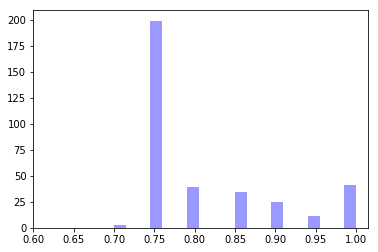

In [102]:
import seaborn as sns
figure = plt.figure(figsize=(6, 4))
ax = figure.add_subplot(1,1,1)
sns.distplot(scores, bins=20, kde=False, rug=False, rug_kws={'color': 'black', 'alpha': 0.5}, color='blue', ax=ax)
# TODO set alpha
ax.set_xlim(0.6, )

In [21]:
nt_targets = "finalDataset"
targets = pd.read_csv(nt_targets,index_col=0) 
targets

,rule_id,inchikey,chembl_id,predicate_id,ref_id,compound_id,object_id,object_external_id,object_name,predicate_name,ref_name
67,149441,CTENFNNZBMHDDG-UHFFFAOYSA-N,CHEMBL59,96,158,50,8511,dopamine,dopamine,agonist,libraries:biomol:targets
193,149774,HQPMJFFEXJELOQ-UHFFFAOYSA-N,CHEMBL280828,96,158,193,8525,NMDA,NMDA,agonist,libraries:biomol:targets
223,149916,CWRVKFFCRWGWCS-UHFFFAOYSA-N,CHEMBL116943,94,158,210,8582,GABAa,GABAa,antagonist,libraries:biomol:targets
280,149931,OFBIFZUFASYYRE-UHFFFAOYSA-N,CHEMBL407,94,158,294,8582,GABAa,GABAa,antagonist,libraries:biomol:targets
286,149468,UWCVGPLTGZWHGS-ZORIOUSZSA-N,CHEMBL531,96,158,402,8511,dopamine,dopamine,agonist,libraries:biomol:targets
293,149896,OLBCVFGFOZPWHH-UHFFFAOYSA-N,CHEMBL526,96,158,445,8582,GABAa,GABAa,agonist,libraries:biomol:targets
295,149903,ZJQHPWUVQPJPQT-UHFFFAOYSA-N,CHEMBL273481,96,158,544,8582,GABAa,GABAa,agonist,libraries:biomol:targets
307,149864,VSMUYYFJVFSVCA-NWDGAFQWSA-N,CHEMBL578988,96,158,593,8528,mGluR,mGluR,agonist,libraries:biomol:targets
319,149522,HANSYUJEPWNHIM-IVMONYBCSA-N,CHEMBL12314,96,158,711,8511,dopamine,dopamine,agonist,libraries:biomol:targets
328,149445,NOJMTMIRQRDZMT-GSPXQYRGSA-N,CHEMBL493,96,158,750,8511,dopamine,dopamine,agonist,libraries:biomol:targets


In [22]:
validIds = targets[targets["compound_id"].isin(IDs)]
vID = validIds["compound_id"].unique()
vID = vID.tolist()
vID

[402,
 445,
 1203,
 1750,
 2142,
 2143,
 2151,
 2152,
 2153,
 2154,
 2155,
 2162,
 2190,
 2193,
 2281,
 2282,
 2285,
 2453,
 2464,
 2467,
 2517,
 2518,
 2519,
 2520,
 2547,
 2549,
 2550,
 2557]

In [23]:
X = []
y = []
counter = 0
counter1 = 0
nt = nt_motion[nt_motion["c_ids"].isin(vID)]
for i, row in nt.iterrows():
    x = row.values[-20496:]
    X.append(x)
    ID = row.c_ids
    t = targets[targets["compound_id"] == ID]
    t = t["object_name"].unique()
    if t == "dopamine":
        y.append(0)
    elif t == "mGluR":
        y.append(1)
    elif t == "NMDA":
        y.append(2)
    elif t == "GABAa":
        y.append(3)
    elif t == "kappa opioid":
        y.append(4)
        
        

In [375]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3]

In [24]:
print(y)
newY = []
newMI = []
counter0 = 0
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
all0 = []
all1 = []
all2 = []
all3 = []
all4 = []
MI0 = []
MI1 = []
MI2 = []
MI3 = []
MI4 = []

for j, i in enumerate(y):
    if i == 0 and counter0 < 15:
        counter0+=1
        newY.append(i)
        newMI.append(X[j])
        all0.append(i)
        MI0.append(X[j])
    if i == 1 and counter1 < 15:
        counter1+=1
        newY.append(i)
        newMI.append(X[j])
        all1.append(i)
        MI1.append(X[j])
    if i == 2 and counter2 < 15:
        counter2+=1
        newY.append(i)
        newMI.append(X[j])
        all2.append(i)
        MI2.append(X[j])
    if i == 3 and counter3 < 15:
        counter3+=1
        newY.append(i)
        newMI.append(X[j])
        all3.append(i)
        MI3.append(X[j])
    if i == 4 and counter4 < 15:
        counter4+=1
        newY.append(i)
        newMI.append(X[j])
        all4.append(i)
        MI4.append(X[j])
                
len(newMI)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3]


75

In [25]:
y = newY
X = newMI

In [26]:
X = np.array(X)
y = np.array(y)
len(X)
len(y)

75

In [27]:
MI0 = np.array(MI0)
MI1 = np.array(MI1)
MI2 = np.array(MI2)
MI3 = np.array(MI3)
MI4 = np.array(MI4)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
def train():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
#     zerosMI = MI0[random_order]
#     onesMI = MI1[random_order]
#     twosMI = MI2[random_order]
#     threesMI = MI3[random_order]
#     foursMI = MI4[random_order]
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)

    classifier = RandomForestClassifier(n_estimators = 10000, random_state = 1, n_jobs = 13, max_features = 100)
    classifier = classifier.fit(MI_train, target_train)
    
    y_predict = classifier.predict(MI_train)
    score = classifier.score(MI_train, target_train)
    
    return y_predict, score

In [105]:
score = []
for i in range(10):
    a = validate()
    score.append(a)
    print(a)

(array([3, 1, 2, 3, 4, 2, 2, 2, 3, 4]), 0.7)
(array([3, 1, 2, 2, 4, 0, 1, 2, 1, 4]), 0.7)
(array([3, 3, 2, 3, 4, 0, 1, 2, 2, 4]), 0.7)
(array([0, 3, 2, 2, 4, 3, 1, 2, 3, 3]), 0.6)
(array([0, 1, 4, 3, 4, 0, 1, 2, 3, 4]), 0.9)
(array([2, 4, 2, 4, 3, 0, 4, 0, 4, 3]), 0.2)
(array([2, 3, 2, 4, 1, 2, 3, 2, 3, 4]), 0.4)
(array([0, 3, 2, 3, 4, 3, 3, 2, 3, 4]), 0.7)
(array([3, 3, 2, 3, 4, 2, 1, 2, 3, 4]), 0.7)
(array([0, 3, 2, 2, 4, 3, 1, 2, 3, 4]), 0.7)


In [30]:
def validate():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
#     zerosMI = MI0[random_order]
#     onesMI = MI1[random_order]
#     twosMI = MI2[random_order]
#     threesMI = MI3[random_order]
#     foursMI = MI4[random_order]
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)

    classifier = RandomForestClassifier(n_estimators = 10000, random_state = 1, n_jobs = 13, max_features = 100)
    classifier = classifier.fit(MI_train, target_train)
    
    y_predict = classifier.predict(MI_validate)
    score = classifier.score(MI_validate, target_validate)
    
    return y_predict, score

In [31]:
score = []
for i in range(5):
    a = validate()
    score.append(a)
    print(a)

(array([0, 1, 2, 1, 4, 0, 1, 2, 3, 4]), 0.9)
(array([0, 3, 2, 3, 4, 3, 3, 2, 2, 4]), 0.6)
(array([2, 3, 2, 3, 4, 0, 3, 2, 3, 4]), 0.7)
(array([0, 1, 2, 3, 4, 0, 3, 2, 3, 4]), 0.9)
(array([3, 4, 4, 3, 4, 0, 4, 2, 3, 4]), 0.6)


In [32]:
def test(avg, counter):
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)

    classifier = RandomForestClassifier(n_estimators = 10000, random_state = 1, n_jobs = 13, max_features = 100)
    classifier = classifier.fit(MI_train, target_train)
    
    y_predict = classifier.predict(MI_test)
    score = classifier.score(MI_test, target_test)
    score = (score*10 + avg*counter) / (counter + 10)
    return y_predict, score

In [2]:
def test2():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)

    classifier2 = RandomForestClassifier(n_estimators = 10000, random_state = 1, n_jobs = 13, max_features = 100)
    classifier2 = classifier2.fit(MI_train, target_train)
    
    y_predict = classifier2.predict(MI_test)
    score = classifier2.score(MI_test, target_test)
    return y_predict, score

In [33]:
score = []
for i in range(10):
    a = test2()
    score.append(a)
    print(a)

(array([0, 2, 2, 3, 4, 0, 1, 2, 3, 3]), 0.8)
(array([0, 1, 2, 3, 2, 4, 1, 2, 3, 4]), 0.8)
(array([2, 1, 2, 3, 4, 2, 1, 0, 1, 3]), 0.5)
(array([0, 1, 2, 3, 4, 2, 1, 2, 3, 4]), 0.9)
(array([0, 1, 2, 1, 4, 0, 3, 2, 3, 1]), 0.7)
(array([3, 1, 2, 3, 4, 2, 3, 2, 3, 4]), 0.7)
(array([0, 3, 2, 3, 4, 0, 3, 2, 3, 4]), 0.8)
(array([2, 2, 2, 3, 4, 0, 1, 2, 1, 4]), 0.7)
(array([0, 4, 2, 3, 4, 0, 4, 2, 1, 4]), 0.7)
(array([0, 2, 2, 1, 4, 2, 1, 2, 2, 4]), 0.6)


In [ ]:
preds = []
for i in score:
    for j in i[0]:
        preds.append(j)
        
preds = np.array(preds)

In [62]:
from sklearn import metrics
target_test = []
for i in range(20):
    for j in range(0, 5):
        target_test.append(j)
target_test = np.array(target_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target_test, preds))

Confusion matrix:
[[12  0  6  1  1]
 [ 0 11  3  4  2]
 [ 1  0 19  0  0]
 [ 0  5  1 14  0]
 [ 0  1  1  2 16]]


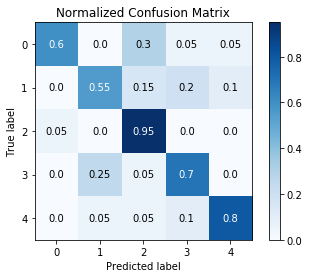

In [81]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, preds, normalize=True)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(5):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [46]:
score = []
oldAvg = 10000
counter = 0
avg = 0
while (oldAvg - avg) > 0.01 or (avg - oldAvg) > 0.01:
    a = test(avg, counter)
    counter+=10
    score.append(a) 
    oldAvg = avg
    avg = a[1]
    print(a[1])


0.7
0.7


In [39]:
from sklearn import svm

In [40]:
def svmValidate():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)
    
    model = svm.LinearSVC()
    model.fit(MI_train, target_train)
    svmPreds = model.predict(MI_validate)
    
    # Classification accuracy

    num_correct = 0
    for i in range(len(svmPreds)):
        if svmPreds[i] == target_validate[i]:
            num_correct += 1
            
    percentage = num_correct/len(svmPreds)
    
    return svmPreds, percentage

In [42]:
score = []
for i in range(10):
    a = svmValidate()
    score.append(a)
    print(a)

(array([0, 3, 2, 3, 4, 0, 4, 0, 3, 3]), 0.6)
(array([1, 1, 2, 2, 3, 0, 1, 2, 3, 4]), 0.7)
(array([1, 1, 2, 0, 4, 0, 1, 2, 2, 3]), 0.6)
(array([0, 1, 4, 2, 4, 0, 3, 3, 3, 3]), 0.5)
(array([2, 1, 2, 3, 3, 0, 1, 2, 2, 4]), 0.7)
(array([0, 1, 2, 0, 4, 1, 3, 2, 3, 4]), 0.7)
(array([0, 1, 4, 4, 4, 0, 3, 3, 0, 4]), 0.5)
(array([1, 4, 2, 3, 4, 1, 1, 2, 3, 4]), 0.7)
(array([0, 1, 2, 3, 4, 1, 4, 3, 3, 4]), 0.7)
(array([1, 1, 2, 0, 0, 1, 1, 2, 3, 4]), 0.6)


In [43]:
def svmTest():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
#     zerosMI = MI0[random_order]
#     onesMI = MI1[random_order]
#     twosMI = MI2[random_order]
#     threesMI = MI3[random_order]
#     foursMI = MI4[random_order]
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)
    
    model = svm.LinearSVC()
    model.fit(MI_train, target_train)
    svmPreds = model.predict(MI_test)
    
    # Classification accuracy

    num_correct = 0
    for i in range(len(svmPreds)):
        if svmPreds[i] == target_test[i]:
            num_correct += 1
            
    percentage = num_correct/len(svmPreds)
    
    return svmPreds, percentage

In [131]:
def svmTrain():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
#     zerosMI = MI0[random_order]
#     onesMI = MI1[random_order]
#     twosMI = MI2[random_order]
#     threesMI = MI3[random_order]
#     foursMI = MI4[random_order]
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(10, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)
    
    model = svm.LinearSVC()
    model.fit(MI_train, target_train)
    svmPreds = model.predict(MI_train)
    
    # Classification accuracy

    num_correct = 0
    for i in range(len(svmPreds)):
        if svmPreds[i] == target_train[i]:
            num_correct += 1
            
    percentage = num_correct/len(svmPreds)
    
    return svmPreds, percentage

In [132]:
score = []
for i in range(10):
    a = svmTrain()
    score.append(a)
    print(a)

(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)
(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]), 1.0)


In [85]:
preds = []
for i in score:
    for j in i[0]:
        preds.append(j)
        
preds = np.array(preds)

In [86]:
from sklearn import metrics
target_test = []
for i in range(20):
    for j in range(0, 5):
        target_test.append(j)
target_test = np.array(target_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target_test, preds))

Confusion matrix:
[[ 9  3  2  5  1]
 [ 0 10  0  4  6]
 [ 1  0 15  1  3]
 [ 0  1  0 19  0]
 [ 1  0  0  5 14]]


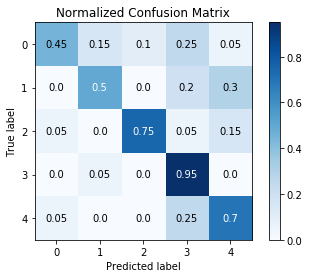

In [87]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, preds, normalize=True)
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
def KNN():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)
    

    model = KNeighborsClassifier(n_neighbors=15)

    # Train the model using the training sets
    model.fit(MI_train, target_train)

    knnPreds = model.predict(MI_validate)
    
    # Classification accuracy

    num_correct = 0
    for i in range(len(knnPreds)):
        if knnPreds[i] == target_validate[i]:
            num_correct += 1
            
    percentage = num_correct/len(knnPreds)
    
    return knnPreds, percentage

In [122]:
def KNNTest():
    zerosMI = np.random.permutation(MI0) # gets a new order for the dataset
    onesMI = np.random.permutation(MI1) # gets a new order for the dataset
    twosMI = np.random.permutation(MI2) # gets a new order for the dataset
    threesMI = np.random.permutation(MI3) # gets a new order for the dataset
    foursMI = np.random.permutation(MI4) # gets a new order for the dataset
    
    target_test = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_validate = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
    target_train = []
    MI_test = []
    MI_validate = []
    MI_train = []

    MI_validate.append(zerosMI[0])
    MI_validate.append(onesMI[0])
    MI_validate.append(twosMI[0])
    MI_validate.append(threesMI[0])
    MI_validate.append(foursMI[0])
    
    MI_validate.append(zerosMI[2])
    MI_validate.append(onesMI[2])
    MI_validate.append(twosMI[2])
    MI_validate.append(threesMI[2])
    MI_validate.append(foursMI[2])

    MI_test.append(zerosMI[1])
    MI_test.append(onesMI[1])
    MI_test.append(twosMI[1])
    MI_test.append(threesMI[1])
    MI_test.append(foursMI[1])
    
    MI_test.append(zerosMI[3])
    MI_test.append(onesMI[3])
    MI_test.append(twosMI[3])
    MI_test.append(threesMI[3])
    MI_test.append(foursMI[3])
    
    for i in range(4, 15):
        MI_train.append(zerosMI[i])
        MI_train.append(onesMI[i])
        MI_train.append(twosMI[i])
        MI_train.append(threesMI[i])
        MI_train.append(foursMI[i])
        target_train.extend([0, 1, 2, 3, 4])
        
    MI_validate = np.array(MI_validate)
    MI_test = np.array(MI_test)
    MI_train = np.array(MI_train)
    target_train = np.array(target_train)
    

    model = KNeighborsClassifier(n_neighbors=15)

    # Train the model using the training sets
    model.fit(MI_train, target_train)

    knnPreds = model.predict(MI_train)
    
    # Classification accuracy

    num_correct = 0
    for i in range(len(knnPreds)):
        if knnPreds[i] == target_train[i]:
            num_correct += 1
            
    percentage = num_correct/len(knnPreds)
    
    return knnPreds, percentage

In [121]:
scoreKNN = []
for i in range(10):
    a = KNNTest()
    scoreKNN.append(a)
    print(a)

(array([0, 4, 2, 2, 4, 3, 2, 2, 2, 2]), 0.4)
(array([3, 1, 3, 3, 4, 3, 3, 4, 3, 4]), 0.5)
(array([3, 3, 2, 3, 4, 2, 4, 2, 3, 3]), 0.5)
(array([0, 1, 0, 0, 3, 0, 3, 3, 1, 2]), 0.3)
(array([4, 3, 2, 3, 4, 3, 4, 2, 3, 2]), 0.5)
(array([0, 4, 2, 3, 3, 2, 3, 2, 3, 4]), 0.6)
(array([2, 3, 0, 3, 4, 3, 1, 3, 3, 4]), 0.5)
(array([3, 4, 3, 3, 4, 3, 4, 2, 3, 2]), 0.4)
(array([2, 4, 3, 3, 2, 3, 2, 2, 3, 3]), 0.3)
(array([0, 3, 3, 3, 3, 2, 2, 3, 3, 3]), 0.3)


In [117]:
scoreKNN = []
for i in range(10):
    a = KNN()
    scoreKNN.append(a)
    print(a)

(array([3, 2, 3, 1, 2, 4, 2, 2, 3, 3]), 0.2)
(array([3, 3, 3, 3, 3, 3, 3, 0, 3, 1]), 0.2)
(array([3, 3, 2, 2, 3, 3, 2, 2, 3, 3]), 0.3)
(array([3, 2, 2, 3, 4, 3, 1, 2, 3, 4]), 0.7)
(array([0, 3, 3, 3, 4, 2, 3, 2, 3, 2]), 0.5)
(array([2, 1, 4, 1, 1, 0, 1, 2, 1, 1]), 0.4)
(array([3, 2, 3, 3, 1, 3, 3, 4, 3, 2]), 0.2)
(array([3, 4, 3, 3, 4, 4, 3, 2, 1, 4]), 0.4)
(array([3, 3, 2, 3, 2, 3, 2, 3, 3, 3]), 0.3)
(array([3, 4, 3, 2, 4, 3, 4, 2, 3, 2]), 0.3)


In [94]:
preds = []
for i in score:
    for j in i[0]:
        preds.append(j)
        
preds = np.array(preds)

In [95]:
from sklearn import metrics
target_test = []
for i in range(20):
    for j in range(0, 5):
        target_test.append(j)
target_test = np.array(target_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target_test, preds))

Confusion matrix:
[[ 9  3  2  5  1]
 [ 0 10  0  4  6]
 [ 1  0 15  1  3]
 [ 0  1  0 19  0]
 [ 1  0  0  5 14]]


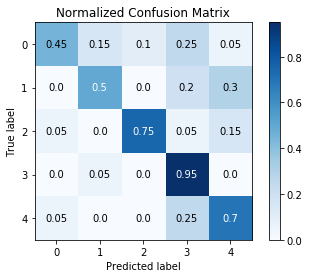

In [96]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, preds, normalize=True)
plt.show()